# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">1 | Introduction ✅</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://media.tenor.com/pfcqgFEp2OsAAAAM/welcome.gif">
    
Summary writing is an important skill for learners of all ages. Summarization enhances reading comprehension, particularly among second language learners and students with learning disabilities. Summary writing also promotes critical thinking, and it’s one of the most effective ways to improve writing abilities. However, students rarely have enough opportunities to practice this skill, as evaluating and providing feedback on summaries can be a time-intensive process for teachers. Innovative technology like large language models (LLMs) could help change this, as teachers could employ these solutions to assess summaries quickly.
    
There have been advancements in the automated evaluation of student writing, including automated scoring for argumentative or narrative writing. However, these existing techniques don't translate well to summary writing. Evaluating summaries introduces an added layer of complexity, where models must consider both the student writing and a single, longer source text. Although there are a handful of current techniques for summary evaluation, these models have often focused on assessing automatically-generated summaries rather than real student writing, as there has historically been a lack of these types of datasets.
    
Competition host CommonLit is a nonprofit education technology organization. CommonLit is dedicated to ensuring that all students, especially students in Title I schools, graduate with the reading, writing, communication, and problem-solving skills they need to be successful in college and beyond. The Learning Agency Lab, Vanderbilt University, and Georgia State University join CommonLit in this mission.

As a result of your help to develop summary scoring algorithms, teachers and students alike will gain a valuable tool that promotes this fundamental skill. Students will have more opportunities to practice summarization, while simultaneously improving their reading comprehension, critical thinking, and writing abilities.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">2 | Importing Libraries 👋</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
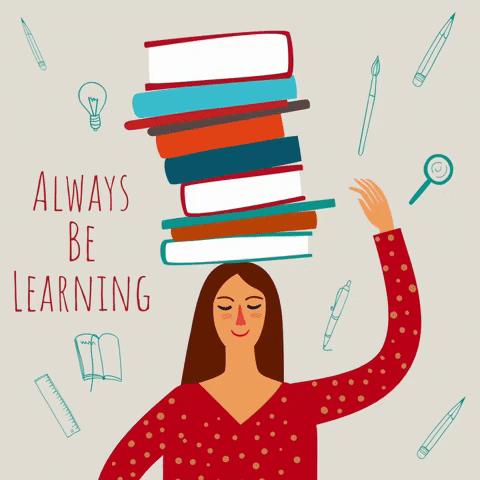![image.png](attachment:59e7d284-4bca-4466-92eb-25214870ecc1.png)

First lets get through some basic terminologies that are used in the feild
* $NLTK$
* $Sklearn$
* $Tensorflow$
    
## $2.1$ $|$ $NLTK$

    Natural Language Toolkit, commonly known as NLTK, is a comprehensive and open-source library for working with human language data in Python. It was  developed to support research and practical applications in the field of natural language processing (NLP), making it an invaluable resource for those interested in text analysis, linguistic research, and language-related tasks. NLTK provides a wide range of tools and resources to work with te
    
    NLTK offers a suite of text processing libraries for tasks such as tokenization, stemming, lemmatization, and part-of-speech tagging. NLTK includes access to various language corpora and lexical resources, making it a valuable asset for linguistic research and language analysis. These corpora cover different languages and domains, and they can be used for research, training models, and testing NLP algorithms. The library provides implementations of a variety of NLP algorithms, including parsers, chunkers, and named entity recognition (NER) systems. These are essential for tasks like syntactic analysis and information extraction.
    
    
## $2.2$ $|$ $Sklearn$
 
   Scikit-learn, often abbreviated as "sklearn," is a popular and powerful open-source machine learning library for Python. It is an essential tool in the field of data science and machine learning, providing a wide range of tools for data preprocessing, feature selection, model building, and evaluation.    Scikit-learn is designed to be user-friendly, efficient, and accessible for both beginners and experts in the field of machine learning.
    
   Scikit-learn covers a broad spectrum of machine learning tasks, including classification, regression, clustering, dimensionality reduction, model     selection, and more. The library offers tools for data preprocessing, such as data scaling, imputation of missing values, feature selection, and   dimensionality reduction.
    

    
## $2.3$ $|$ $Tensorflow$
    
    TensorFlow is an open-source machine learning framework developed by the Google Brain team. It has become one of the most popular and widely used deep learning frameworks, known for its flexibility, scalability, and comprehensive support for various machine learning tasks. TensorFlow is designed to make it easier for developers and researchers to build, train, and deploy machine learning models, especially deep neural networks. 
    
    It supports a wide range of tasks, from traditional machine learning to deep learning, and allows you to create and experiment with various model architectures. It can be used on various platforms, from single machines to distributed clusters and even on GPUs and TPUs (Tensor Processing Units), which are hardware accelerators for deep learning.

TensorFlow offers a user-friendly and intuitive API that allows developers to create and train machine learning models efficiently. It also provides a graphical interface called TensorFlow Extended (TFX) for production pipelines. TensorFlow comes with a tool called TensorBoard, which makes it easy to visualize and monitor the training and performance of your machine learning models. This is invaluable for debugging and optimizing your models.
    
 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
#nltk.download('all')
#nltk.download('corpora/wordnet')
#nltk.download('averaged_perceptron_tagger')
# Download the required resource
nltk.download('wordnet')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

#! pip install "/kaggle/input/autocorrect/autocorrect-2.6.1.tar"
#! pip install "/kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl"
#!pip install autocorrect
#!pip install pyspellchecker

#!pip install --upgrade scikit-learn

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.externals 
# import joblib

!pip install textstat
from textstat import flesch_kincaid_grade

# import gc
# import string
# import pickle
# import joblib
# import operator
# import lightgbm as lgb
from textblob import TextBlob

from tqdm import tqdm

# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import callbacks
# from tensorflow.keras import optimizers
# from tensorflow.keras.models import Model

tqdm.pandas()
np.random.seed(2022)
#tf.random.set_seed(2022)
plt.style.use('fivethirtyeight')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/co

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">3 | Data 📊</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://media.tenor.com/Kt00_NI0XegAAAAM/gee-data-entry.gif" width = 200>

Now lets dive into the data

###  $3.1$ $|$ $Train$
 
We have our training data in two different directories prompts_train/summaries_train

In [3]:
# Load training datasets
summaries_train = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv')
prompts_train = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv')

In [4]:
# Display basic information about the datasets
print("Shape of Summaries Train Dataset:")
print(summaries_train.shape)
print("Shape of \nPrompts Train Dataset:")
print(prompts_train.shape)

Shape of Summaries Train Dataset:
(7165, 5)
Shape of 
Prompts Train Dataset:
(4, 4)


In [5]:
# Display basic information about the datasets
print("Summaries Train Dataset:")
print(summaries_train.info())
print("\nPrompts Train Dataset:")
print(prompts_train.info())

Summaries Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7165 non-null   object 
 1   prompt_id   7165 non-null   object 
 2   text        7165 non-null   object 
 3   content     7165 non-null   float64
 4   wording     7165 non-null   float64
dtypes: float64(2), object(3)
memory usage: 280.0+ KB
None

Prompts Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt_id        4 non-null      object
 1   prompt_question  4 non-null      object
 2   prompt_title     4 non-null      object
 3   prompt_text      4 non-null      object
dtypes: object(4)
memory usage: 256.0+ bytes
None


In [6]:
# Display the first few rows of each dataset
print("\nFirst few rows of Summaries Train Dataset:")


First few rows of Summaries Train Dataset:


In [7]:
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [8]:
print("\nFirst few rows of Prompts Train Dataset:")


First few rows of Prompts Train Dataset:


In [9]:
prompts_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [10]:
# Summary statistics
print("\nSummary statistics for Summaries Train Dataset:")
print(summaries_train.describe())


Summary statistics for Summaries Train Dataset:
           content      wording
count  7165.000000  7165.000000
mean     -0.014853    -0.063072
std       1.043569     1.036048
min      -1.729859    -1.962614
25%      -0.799545    -0.872720
50%      -0.093814    -0.081769
75%       0.499660     0.503833
max       3.900326     4.310693


In [11]:
# Merge the datasets based on the common column 'prompt_id'
merged_train = pd.merge(summaries_train, prompts_train, on='prompt_id')

# Display the merged dataset
print("Merged Train Dataset:")
print(merged_train.info())
print("\nFirst few rows of Merged Train Dataset:")
print(merged_train.head())

Merged Train Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       7165 non-null   object 
 1   prompt_id        7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
 5   prompt_question  7165 non-null   object 
 6   prompt_title     7165 non-null   object 
 7   prompt_text      7165 non-null   object 
dtypes: float64(2), object(6)
memory usage: 503.8+ KB
None

First few rows of Merged Train Dataset:
     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment 

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#800080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #800080">4 | Exploratory Data Analysis 📄️</p>

## $4.1$ $|$ $Distribution$ $of$ $Content$ $and$ $Wording$ $Scores$

#### $Wording$ $Scores$
     We see a few spikes in the wording scores - a **Bimodal distribution** which clearly states that there are two prominent groups or clusters of data points. One set of summaries have a lower mode while the other set has the higher mode. Now, these set of summaries having two different modes of wording scores could depend on many factors like the physical factors - age, gender or simply mental factors - opinions, diverse thinking, knowledge. Basically, how an individual aims to use words that would exactly or appropriatley be used in essays.
   

#### $Content$ $Scores$
     There is a simple unimodal distribution with one mean, median, mode and this indicates that most of the student summaries conveyed the exact or appropriate message as asked through the prompts. Most of them understood their assignments!
   
   
   **A very interesting point is to note that even though the usage of words is great i.e. high wording score, however, the content score is low i.e the message or the information was not clearly expressed. Such situations can occur due to lack of imagination or knowledge and experience when writing essays or simply because they used a lot of jargons!**

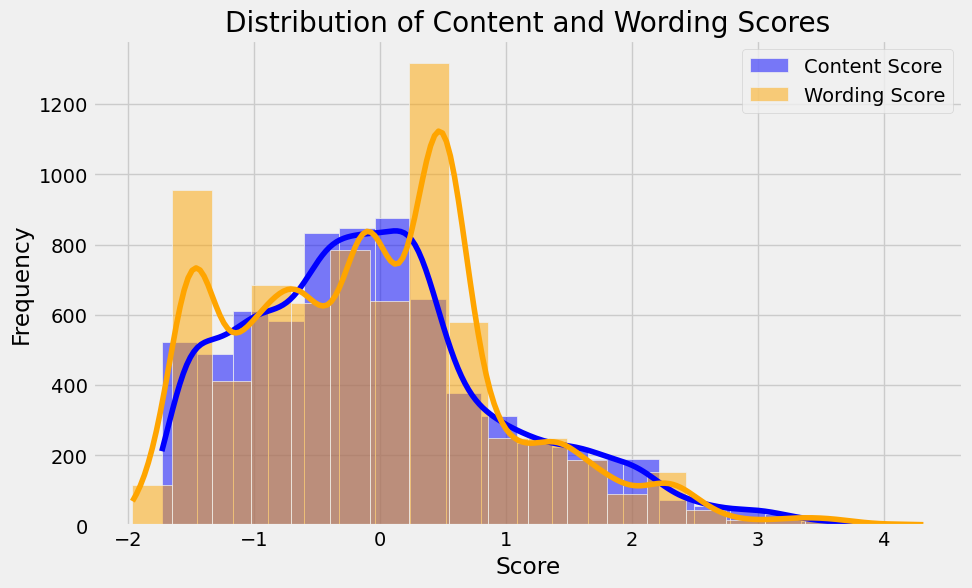

In [12]:
# Distribution of content and wording scores
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_train, x='content', bins=20, kde=True, color='blue', label='Content Score')
sns.histplot(data=merged_train, x='wording', bins=20, kde=True, color='orange', label='Wording Score')
plt.title('Distribution of Content and Wording Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## $4.2$ $|$ $Create$ $a$ $correlation$ $heatmap$ $to$ $visualize$ $the$ $correlation$ $between$ $content$ $and$ $wording$ $scores$

    The wording used can significantly impact how well the content is understood. Clear and precise wording can make complex ideas more accessible, while vague or convoluted wording can confuse the audience. The selection of persuasive language and rhetorical devices can influence how an audience perceives and reacts to the content. 
    
    Clear and well-structured wording enhances the readability and comprehensibility of an essay. If the wording is muddled, overly complex, or contains grammatical errors, it can obscure the content, making it difficult for readers to understand the author's ideas. This can lead to a lower content score.
    
    Therefore, a positive relationship between a high wording score (clarity and precision) and a high content score (effective communication of ideas) of 0.75 means as one score increases (e.g., content score), the other score (wording score) tends to increase as well. This strong correlation suggests that the quality of wording in an essay is closely linked to the quality of its content. 

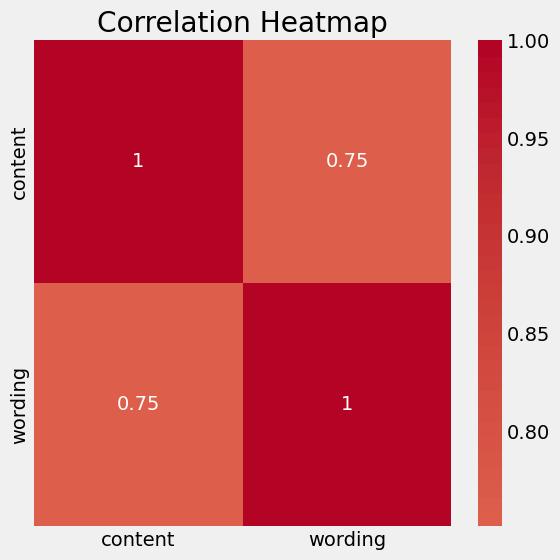

In [13]:
# Correlation heatmap
correlation_matrix = merged_train[['content', 'wording']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## $4.3$ $|$ $Distribution$ $of$ $content$ $and$ $wording$ $scores$ $for$ $different$ $prompts$ $or$ $groups$

#### $Content$ $Scores$
    The average content score for all the prompts is pretty much on the same line as we discovered from its unimodal distribution.


#### $Wording$ $Scores$
    Whereas, the average score for the prompt 'The third wave' is slightly higher than all the other means.

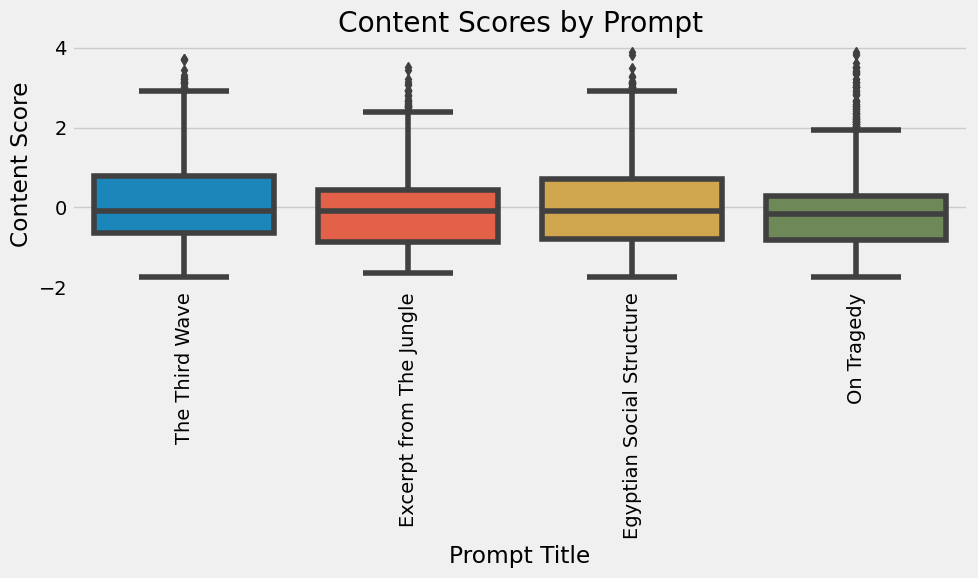

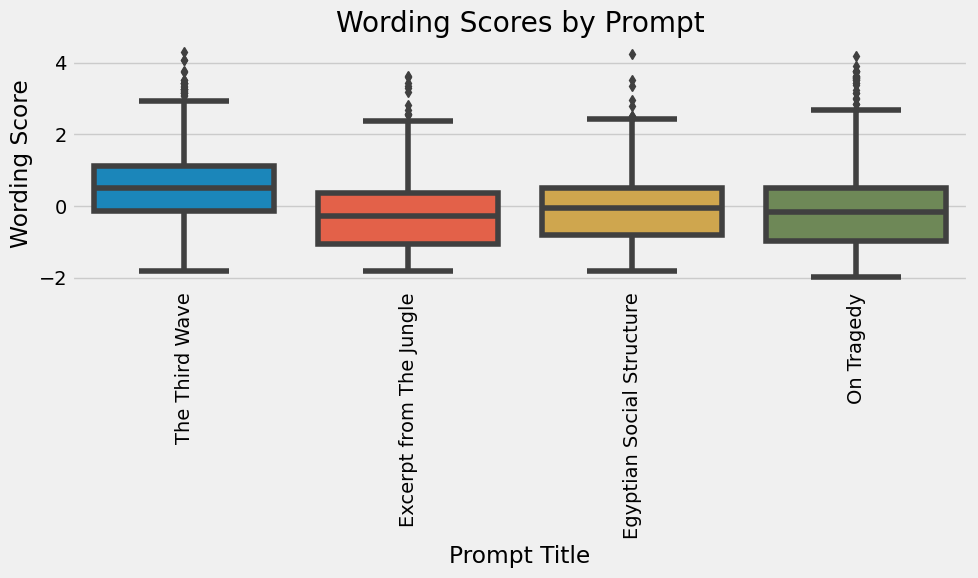

In [14]:
# Create box plots for content and wording scores grouped by prompts
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train, x='prompt_title', y='content')
plt.title('Content Scores by Prompt')
plt.xticks(rotation=90)
plt.ylabel('Content Score')
plt.xlabel('Prompt Title')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train, x='prompt_title', y='wording')
plt.title('Wording Scores by Prompt')
plt.xticks(rotation=90)
plt.ylabel('Wording Score')
plt.xlabel('Prompt Title')
plt.tight_layout()
plt.show()

## $4.4$ $|$ $Summary$ $Lengths$
   
    We see a positively skewed distribution for the summary lengths submitted by students which means that most summaries are relatively short in terms of word count or character count. Short summaries are more common, and they are clustered around the lower end of the length scale.
    
   #### $Flags$ $🚩$
* Longer summaries might have a higher content score if they successfully capture more essential information from the source text. A longer summary could potentially cover more key points, details, and context, which could positively impact the content score. On the other hand, overly long summaries might include redundant or irrelevant information, which could negatively impact the content score. It's not just about length but the quality and relevance of the content.   
* The wording score relates to how well the summary is written, including aspects like grammar, fluency, and clarity. The length of the summary can indirectly affect the wording score in the following ways: Longer summaries might have more room for errors in grammar or clarity, which could negatively impact the wording score. Extremely short summaries might not provide sufficient context or explanations, potentially leading to a lower wording score.


In [15]:
# Calculate text lengths for source text and summary
merged_train['source_text_length'] = merged_train['prompt_text'].str.len()
merged_train['summary_length'] = merged_train['text'].str.len()

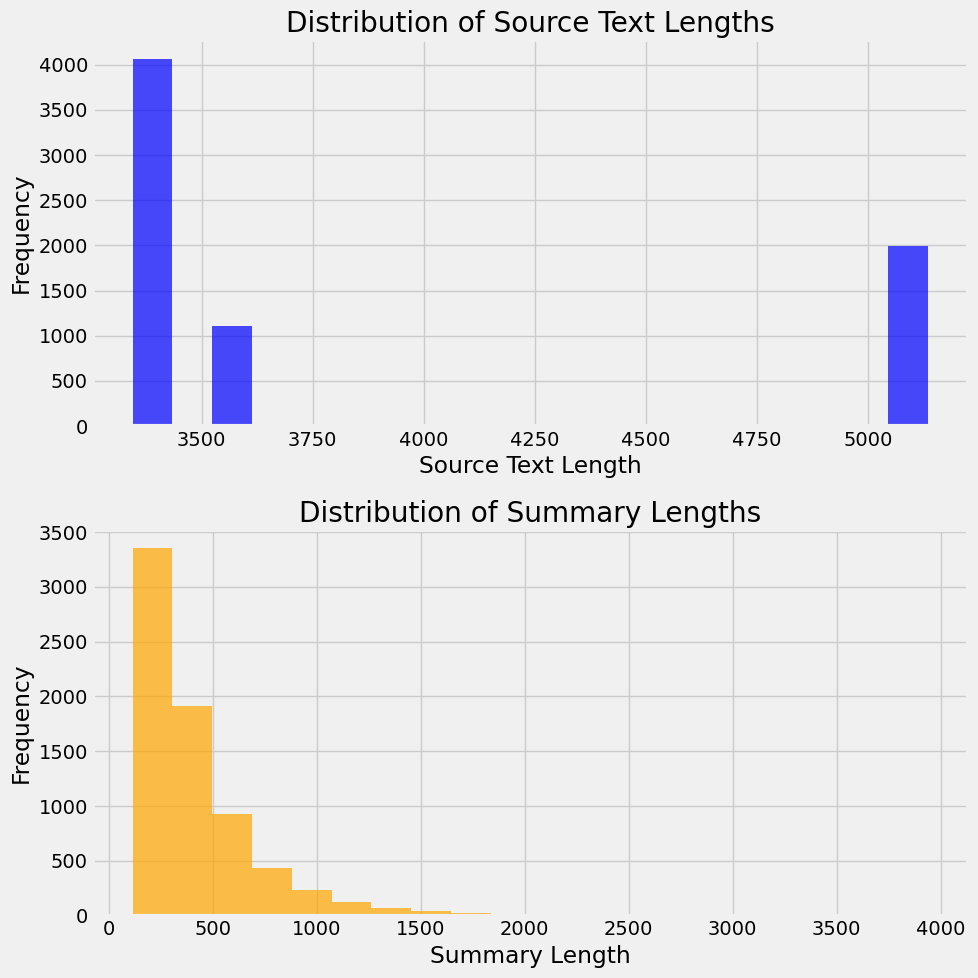

In [16]:
# Create subplots for source text length and summary length distributions
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Distribution of source text lengths
axes[0].hist(merged_train['source_text_length'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Source Text Lengths')
axes[0].set_xlabel('Source Text Length')
axes[0].set_ylabel('Frequency')

# Distribution of summary lengths
axes[1].hist(merged_train['summary_length'], bins=20, color='orange', alpha=0.7)
axes[1].set_title('Distribution of Summary Lengths')
axes[1].set_xlabel('Summary Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## $4.5$ $|$ $Word$ $Clouds$

    These are the most occurred words in the summaries submitted by the students. We can see some overlaps in the words in both the promp texts and the summarie which is great!

In [17]:
# Concatenate source texts and summaries
all_source_texts = ' '.join(merged_train['prompt_text'])
all_summaries = ' '.join(merged_train['text'])

In [18]:
# Create WordCloud for source texts
wordcloud_source = WordCloud(width=800, height=400, background_color='white').generate(all_source_texts)

# Create WordCloud for summaries
wordcloud_summaries = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

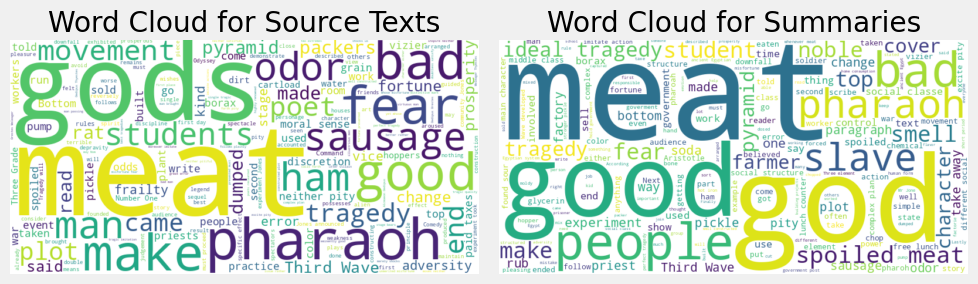

In [19]:
# Display WordClouds
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.title('Word Cloud for Source Texts')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summaries, interpolation='bilinear')
plt.title('Word Cloud for Summaries')
plt.axis('off')

plt.tight_layout()
plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">5 | Text Preprocessing 📂</p>

In [20]:
# Handle missing values by filling them with empty strings
merged_train['text'].fillna('', inplace=True)
merged_train['prompt_text'].fillna('', inplace=True)

### $5.1$ $Cleaning$ $Text$

    Removing unwanted `html` tags, URLs or any special characters

In [21]:
# Preprocessing functions
def clean_text(text):
    cleaned_text = text.lower()
    cleaned_text = re.sub('<[^<]+?>', '', cleaned_text)  # Remove HTML tags
    #cleaned_text = re.sub('<[^<]+?>', '', cleaned_text)  # Remove HTML tags
    cleaned_text = re.sub(r'https://.*', '', cleaned_text)  # Remove URLs
    # Remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', cleaned_text)
    #result = re.sub(r'[^a-zA-Z0-9]+', ' ', result)  # Remove non-alphanumeric characters
    #result = result.lower()
    return cleaned_text

### $5.2$ $Word$ $Tokenization$ $&$ $Stopward$ $Removal$
    Removing unwanted words from the text that may increase the sparsity of the data. All the frequent occuring words like `the, an, a, of, is, am, etc` are removed so that only relevant words are taken into analysis

In [22]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    return filtered_tokens


### $5.3$ $Lemmatization$
    Converting all the diverse variations of words into their root or true form so keeping in mind their corresponding meaning in the current form. For eg, words like caring, care, car, careless is changed to care, care, car, careless

In [23]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [24]:
# Apply data cleaning and preprocessing
merged_train['cleaned_text'] = merged_train['text'].apply(clean_text)
merged_train['cleaned_prompt_text'] = merged_train['prompt_text'].apply(clean_text)

merged_train['tokenized_text'] = merged_train['cleaned_text'].apply(tokenize_and_remove_stopwords)
merged_train['tokenized_prompt_text'] = merged_train['cleaned_prompt_text'].apply(tokenize_and_remove_stopwords)

#merged_train['stemmed_text'] = merged_train['tokenized_text'].apply(stem_tokens)
#merged_train['stemmed_prompt_text'] = merged_train['tokenized_prompt_text'].apply(stem_tokens)

merged_train['lemmatized_text'] = merged_train['tokenized_text'].apply(lemmatize_tokens)
merged_train['lemmatized_prompt_text'] = merged_train['tokenized_prompt_text'].apply(lemmatize_tokens)

### $5.4$ $Bi-grams$ $&$ $Tri-grams$
    Bi-grams are sequences of two consecutive words in a text. They capture word pairs, providing context and capturing relationships between adjacent words. For example, in the sentence "The quick brown fox," the bi-grams would be "The quick," "quick brown," and "brown fox."
    Bi-grams can help capture phrases or expressions that carry specific meanings or sentiment. For instance, "not good" in sentiment analysis.
    
    Tri-grams are similar to bi-grams but consist of three consecutive words in a text. They capture word triplets, offering more context and capturing longer-range relationships. For example, in the sentence "The quick brown fox jumps," the tri-grams would be "The quick brown," "quick brown fox," and "brown fox jumps."

In [25]:
# Create bi-grams and tri-grams
merged_train['bi_grams'] = merged_train['lemmatized_text'].apply(lambda tokens: list(ngrams(tokens, 2)))
merged_train['tri_grams'] = merged_train['lemmatized_text'].apply(lambda tokens: list(ngrams(tokens, 3)))

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">6 | Feature Engineering 🏆</p>

    Let us derive some features from the existing summary_text and prompt_text in order to serve those as inputs to the model to predict our wording score and content score.

#### $Text$ $Length$ $Features$

  ###### Content Score: 
    Longer text lengths may positively impact the content score. Longer texts can provide more comprehensive coverage of a topic, capturing more details and information, which is often associated with higher content quality.

  ###### Wording Score: 
    Longer texts may have a more negative effect on the wording score. Longer texts can be more prone to grammatical errors, verbosity, and potential issues with clarity. If not written concisely, it may lead to a lower wording score.

In [26]:
#Calculate the relative length of the summary as a percentage of the prompt
merged_train['relative_length'] = (merged_train['summary_length'] / merged_train['source_text_length']) * 100

#### $NLP$ $Based$ $Features$

  ###### Content Score: 
    NLP-based features can enhance the content score by capturing specific content-related characteristics. For example, the presence of certain keywords, the structure of sentences, or the use of domain-specific terminology can contribute to better content scores.
  ###### Wording Score: 
    NLP-based features can also contribute to the wording score by assessing factors like grammatical correctness, sentence fluency, and the overall clarity of the text.

In [27]:
from nltk.tokenize import sent_tokenize

In [28]:
# Calculate word count in the summary
merged_train['summary_word_count'] = merged_train['cleaned_text'].apply(lambda x: len(word_tokenize(x)))

# Calculate word count in the prompt
merged_train['prompt_word_count'] = merged_train['cleaned_prompt_text'].apply(lambda x: len(word_tokenize(x)))

# Calculate sentence count in the summary
merged_train['summary_sentence_count'] = merged_train['cleaned_text'].apply(lambda x: len(sent_tokenize(x)))

# Calculate average word length in the summary
merged_train['average_word_length'] = merged_train['cleaned_text'].apply(lambda x: sum(len(word) for word in word_tokenize(x)) / len(word_tokenize(x)))

# Calculate average sentence length in the summary
merged_train['average_sentence_length'] = merged_train['cleaned_text'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))


#### $Sentiment$ $Analysis$

  ###### Content Score: 
    Sentiment analysis is generally content-neutral. However, it can indirectly affect content score if the sentiment analysis reveals strong positive or negative sentiment that is irrelevant to the content. In such cases, the content score may be impacted negatively.

  ###### Wording Score: 
    Sentiment analysis may not have a direct effect on wording score. However, if sentiment-related language affects the clarity or tone of the text, it can influence the wording score.

In [29]:
# Assuming you've merged summaries_train and prompts_train into a single DataFrame
# Let's call this merged_df

# Define a function to calculate sentiment scores
def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
    return sentiment_score

# Calculate sentiment scores for the summary text
merged_train['summary_sentiment'] = merged_train['cleaned_text'].apply(calculate_sentiment)

# Calculate sentiment scores for the prompt text
merged_train['prompt_sentiment'] = merged_train['cleaned_prompt_text'].apply(calculate_sentiment)

#### $Prompt$ $and$ $Summary$ $Relatedness$

  ###### Content Score:

    High Relevance: When the summary is highly relevant to the prompt, it is more likely to receive a higher content score. Relevance in this context means that the summary addresses the specific questions or topics mentioned in the prompt effectively. Relevance between the prompt and summary indicates that the content score is strong, as the summary aligns well with the task or requirements.
    
    Low Relevance: If the summary deviates from the prompt or does not address the key points or questions raised in the prompt, it will receive a lower content score. Low relevance implies that the content is lacking or does not adequately cover the required information. In this case, the content score is negatively impacted.

  ###### Wording Score:

    High Relevance: While relevance primarily pertains to content, it can indirectly influence wording score. When a summary is highly relevant to the prompt, it is more likely to be well-structured and to use language that matches the task requirements. Clarity, coherence, and language fluency are often improved when the content aligns with the prompt.
    
    Low Relevance: Low relevance between the prompt and summary can negatively impact the wording score. If the summary veers off-topic or uses language that is inappropriate or irrelevant to the prompt, it may result in a lower wording score. Irrelevant content often introduces issues related to language quality, tone, and coherence.

  


In [30]:
# Define a function to analyze prompt-topic relatedness
def prompt_relatedness(row):
    # Extract keywords from the prompt text
    prompt_keywords = re.findall(r'\w+', row['prompt_text'].lower())
    
    # Count the number of prompt-related keywords in the summary text
    summary_text = row['text'].lower()
    related_keyword_count = sum(1 for keyword in prompt_keywords if keyword in summary_text)
    
    return related_keyword_count

# Calculate the count of prompt-related keywords in the summary
merged_train['prompt_related_keyword_count'] = merged_train.apply(prompt_relatedness, axis=1)


#### $Text$ $Similarity$

  ###### Content Score: 
    Text similarity measures like cosine similarity can positively affect the content score by demonstrating that the summary is similar in content to the source text. Higher similarity may indicate a more faithful representation of the content.

  ###### Wording Score: 
    Similarity measures are more directly related to content than wording. However, overly close similarity might result in a lower wording score if the summary appears to be a mere copy of the source text, lacking original wording or phrasing.

In [31]:
# Assuming you've merged summaries_train and prompts_train into a single DataFrame
# Let's call this merged_df

# Define a function to calculate cosine similarity
def calculate_cosine_similarity(prompt, summary):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([prompt, summary])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate Cosine Similarity between prompt and summary for each row
merged_train['cosine_similarity'] = merged_train.apply(lambda row: calculate_cosine_similarity(row['cleaned_prompt_text'], row['cleaned_text']), axis=1)


  ###### $Cosine$ $Similarity$
     
    
   **Content Score**
      
    A higher cosine similarity indicates that the summary is more similar in content to the source text. This can positively impact the content score, as it suggests that the summary effectively captures the content and key information from the source text. 
    
    Lower cosine similarity implies that the summary diverges from the source text in terms of content. This can negatively affect the content score, as it suggests that the summary may miss important details or key information from the source text. 
    
    
   **Wording Score**
   
    A higher cosine similarity often indicates that the summary uses similar wording and language as the source text. This can have a positive effect on the wording score because it suggests that the summary maintains language consistency and potentially achieves high fluency and clarity. 
   
    Lower cosine similarity suggests that the summary may use different wording or language than the source text. This can negatively affect the wording score if the variation in wording leads to issues with clarity, fluency, or grammar. 
     

#### $Readability$ $Measure$

  ###### Content Score: 
    Readability metrics can have a minor impact on content score. They may indirectly affect content quality by influencing how well the text can be understood. Higher readability scores (easier-to-read text) may slightly improve content score, as long as clarity and information coverage are maintained.

  ###### Wording Score: 
    Readability metrics have a direct effect on wording score. Higher readability scores typically indicate better wording. Simpler, more easily understood language can positively influence the wording score, as long as it doesn't oversimplify the content.

In [32]:
# Assuming you've merged summaries_train and prompts_train into a single DataFrame
# Let's call this merged_df

# Define a function to calculate the Flesch-Kincaid readability score
def calculate_flesch_kincaid(text):
    return flesch_kincaid_grade(text)

# Calculate the Flesch-Kincaid readability score for each summary
merged_train['flesch_kincaid_score'] = merged_train['cleaned_text'].apply(calculate_flesch_kincaid)

  ###### $Flesch-Kincaid$ $Grade$
    The Flesch-Kincaid Grade Level is a readability metric that assesses the ease with which a text can be read. It calculates a grade level required to understand the text, with a higher grade level indicating more complex and difficult-to-read text. 
    
   **Content Score**
   
    If the text's Flesch-Kincaid grade level is lower, it implies that the text is easier to read and understand. This could positively affect the content score because a more accessible text is likely to convey its content more effectively. 
    
    A higher Flesch-Kincaid grade level indicates a more complex and potentially challenging text. While complex texts may contain detailed information, they might require a higher level of comprehension. This can either positively or negatively affect the content score depending on the intended audience.
    
   **Wording Score**
   
    A lower Flesch-Kincaid grade level typically indicates that the text is written in simpler language. This can have a positive effect on the wording score because it suggests that the text is more likely to be clear, concise, and fluent. 
    
    A higher Flesch-Kincaid grade level implies that the text is more complex and potentially harder to understand. This can negatively affect the wording score because complex text may have issues with clarity, fluency, or overly technical language. 

### $6.1$ $|$ $New$ $Train$ $Data$

In [33]:
merged_train_new = merged_train.drop(['student_id', 'prompt_id', 'text', 'content', 'wording',
       'prompt_question', 'prompt_title', 'prompt_text',],axis=1)

In [34]:
# Define a function to calculate the length of a list of tuples
def list_length(lst):
    return len(lst)

# Apply the function to each element in the "column_name" column
merged_train['len_tri_grams'] = merged_train['tri_grams'].apply(list_length)
merged_train['len_bi_grams'] = merged_train['bi_grams'].apply(list_length)

In [35]:
merged_train_new = merged_train.drop(['len_bi_grams','summary_sentence_count','student_id', 'prompt_id', 'text','prompt_question', 'prompt_title', 'prompt_text','cleaned_text','cleaned_prompt_text', 'tokenized_text', 'tokenized_prompt_text','lemmatized_text', 'lemmatized_prompt_text', 'bi_grams', 'tri_grams'], axis=1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#8B8000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #8B8000">7 | Model Setup 🔨</p>

<div style="border-radius:10px; border:#FFFF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWhnN2I2bDB0d2FjN3hlbTF1MDlkeWFreDdmdjB4Ym1rY2toYWFxdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/5dYeglPmPC5lL7xYhs/giphy.gif" width = 400>
    
This time we will be training multiple models

### $7.1$ $MCRMSE$

MCRMSE (Mean Columnwise Root Mean Squared Error) is a metric used to evaluate the performance of a machine learning model. In the context of MCRMSE, lower values are better. A low MCRMSE indicates that the model's predictions are close to the actual values, suggesting that the model is accurate in its predictions for each column (target) being evaluated.

In [36]:
def custom_mcrmse(y_true, y_pred):
    mse = ((y_true - y_pred) ** 2)
    mcrmse = np.sqrt(mse.mean())
    return mcrmse

### $7.2$ $Model$ $Initialization$

In [37]:
# Create a dictionary to store models and their names
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(),
    'k-Nearest Neighbors': KNeighborsRegressor(),
    'Linear SVM'         : LinearSVR(max_iter = 2000),
    'SGD'                : SGDRegressor(random_state = 0),
    'Ridge'              : Ridge(random_state = 0),
    'XGBoost'            : XGBRegressor(random_state = 0),
    'AdaBoost'           : AdaBoostRegressor(random_state = 0),
    'ExtreTrees'         : ExtraTreesRegressor(random_state = 0)
}

### $7.3$ $|$ $Train$ $&$ $Test$

In [38]:
y_content1 = merged_train_new['content']
y_wording1 = merged_train_new['wording']
X = merged_train_new.drop(['content','wording'], axis=1)
X_train, X_test, y_content_train, y_content_test, y_wording_train, y_wording_test = train_test_split(X, y_content1, y_wording1, test_size=0.2, random_state=42)

### $7.4$ $|$ $Model$ $Building$

In [39]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Create a pipeline with TF-IDF vectorization and the model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Train the model on content scores
    pipeline.fit(X_train, y_content_train)
    
    # Make predictions on the validation set
    y_content_pred = pipeline.predict(X_test)
    
    # Train the model on wording scores
    pipeline.fit(X_train, y_wording_train)
    
    # Make predictions on the validation set
    y_wording_pred = pipeline.predict(X_test)
    
    # Calculate MCRMSE for content and wording predictions
    mcrmse_content = custom_mcrmse(y_content_test, y_content_pred)
    mcrmse_wording = custom_mcrmse(y_wording_test, y_wording_pred)
    
    # Store results
    results[model_name] = {
        'MCRMSE Content': mcrmse_content,
        'MCRMSE Wording': mcrmse_wording
    }
    
# Print evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MCRMSE Content: {metrics['MCRMSE Content']:.4f}")
    print(f"MCRMSE Wording: {metrics['MCRMSE Wording']:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: Linear Regression
MCRMSE Content: 0.5770
MCRMSE Wording: 0.8047
Model: Decision Tree
MCRMSE Content: 0.6891
MCRMSE Wording: 0.9655
Model: Random Forest
MCRMSE Content: 0.4803
MCRMSE Wording: 0.6792
Model: Gradient Boosting
MCRMSE Content: 0.4779
MCRMSE Wording: 0.6907
Model: Neural Network
MCRMSE Content: 0.7639
MCRMSE Wording: 0.9954
Model: k-Nearest Neighbors
MCRMSE Content: 0.5163
MCRMSE Wording: 0.7445
Model: Linear SVM
MCRMSE Content: 1.9041
MCRMSE Wording: 0.8552
Model: SGD
MCRMSE Content: 2924625047814617.5000
MCRMSE Wording: 6481140094079224.0000
Model: Ridge
MCRMSE Content: 0.5771
MCRMSE Wording: 0.8047
Model: XGBoost
MCRMSE Content: 0.5012
MCRMSE Wording: 0.7063
Model: AdaBoost
MCRMSE Content: 0.5275
MCRMSE Wording: 0.7470
Model: ExtreTrees
MCRMSE Content: 0.4885
MCRMSE Wording: 0.6844


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">8 | Results 🏆</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

The results represent the performance of various machine learning models on the given task. These models include linear regression, decision tree, random forest, gradient boosting, neural network, k-nearest neighbors, linear SVM, SGD, ridge, XGBoost, AdaBoost, and ExtraTrees.

    
    
<img src = "https://media.giphy.com/media/l41JQXDMkGHpJI5R6/giphy.gif">
    

    Models like Decision Tree, Random Forest, Gradient Boosting, XGBoost, and ExtraTrees have relatively low MCRMSE scores for both content and wording. This suggests that these models consistently perform well in making predictions for both aspects of the text. They exhibit strong consistency and accuracy.
    
    Some models, such as Neural Network, k-Nearest Neighbors, Linear SVM, and AdaBoost, have relatively low MCRMSE scores for content but higher scores for wording. This indicates that these models are better at capturing the content aspect of the text than the wording aspect. They may struggle with language quality, fluency, or clarity, resulting in higher MCRMSE scores for wording.
    
     While content scores are generally low across models, indicating accurate predictions for content, the wording scores vary more widely. This suggests that capturing language quality and clarity is a more challenging aspect of the task, and some models perform better than others in this regard.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">12 | Ending 🏁</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**I WILL BE IMPROVISING IT LATER TOO.**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**


**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE $:)$**

*THANK YOU FOR THE COMMUNITY AND THE NOTEBOOK I REFERRED FOR MARKDOWN SUPPORT*
    
<img src = "https://i.imgflip.com/19aadg.jpg">